<a href="https://colab.research.google.com/github/RubyNixx/BPP_Telecomm_Churn/blob/main/Programming_For_Analysts_Business_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Analysing historic customer churn at BPP Telecom and prediciting future churn.

**Background:**

BPP Telecom, a leading telecommunications provider headquartered in the UK, has been on a progressive journey, expanding its offerings from traditional phone services to a broad spectrum encompassing high-speed internet and cutting-edge streaming services.

**Business Problem:**

Despite the diversification and growth of its services, BPP has been encountering a rising tide of customer churn. This escalating issue has begun to erode its customer base and revenues, posing a clear constraint to the company's future growth trajectory.

**Data used:**

The dataset this model is based on is sourced from Customer information. This dataset captures an array of attributes for each customer, ranging from demographics to service usage, churn and charges.

**Aim of this notebook:**

Extract key insights from the customer data to construct a predictive model anticipating customer churn.



---



##Set up enviroment

Python libraries are collections of pre-written code and functions that extend the capabilities of the Python programming language. They provide a wide range of tools and modules for various tasks, making it easier to work on specific tasks without reinventing the wheel.

To use the libraries, we need to import the libraries and give them a alias to use within this project.

In [53]:
#Import libraries

#Import pandas for data manipulation and analysis. It offers data structures and operations for manipulating numerical tables and time series.
import pandas as pd

#Import numpy library to add support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
import numpy as np

#Import the matplotlib.pyplot module, which is a popular plotting library in Python.
import matplotlib.pyplot as plt

#Import the Plotly Express library. PX is the easy-to-use, high-level interface to Plotly, which operates on a variety of types of data and produces easy-to-style figures.
import plotly.express as px
#Helpful guide to colours: https://www.w3.org/wiki/CSS/Properties/color/keywords

#Import the Seaborn data visualisation library. Seaborn is built on top of Matplotlib and provides a high-level interface for drawing attractive statistical graphics.
import seaborn as sns

#Import tabula to read data from pdf formatted file.
!pip install tabula-py
import tabula

#Install schkit-learn which is a machine learning library.
!pip install scikit-learn

  #Import train_test_split function from the sklearn.model_selection module. Used for splitting datasets into training and testing sets in machine learning.
from sklearn.model_selection import train_test_split

  #Import the StandardScaler class from the sklearn.preprocessing module. The StandardScaler is a part of the scikit-learn library. It is used for standardising features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

  #Import OneHotEncoder class from scikit-learn library. The OneHotEncoder converts categorical variables into a format suitable for machine learning algorithms. I've selected this over utilising pandas get_dummies as it handles unknown values better.
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

  #The make_pipeline function is a utility provided by scikit-learn to create a machine learning pipeline.
from sklearn.pipeline import make_pipeline

#Import Classification algorithms from scikit-learn library.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier
)

  #Import three commonly used functions from the scikit-learn library. Used to evaluate classification models: accuracy_score, classification_report, and confusion_matrix.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Set up interactive data tables for notebook
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


## Data Sourcing & Wrangling

To begin this project, the first stage is to source the data we will be using for our exploratory analysis and key outputs.

###Source Data

Step 1. Run the below code, which will prompt you to browse and upload files to google colab. Using the browse button, locate the two files below & upload them:

*   bpp_churn_data.pdf
*    bpp_churn_data.xlsx

In [2]:
from google.colab import files
uploaded = files.upload()

#You should now see these files uploaded to 'Files' in the left hand folder on Google Colab.

Saving bpp_churn_data.pdf to bpp_churn_data.pdf
Saving bpp_churn_data.xlsx to bpp_churn_data.xlsx


Note that the data is sourced from two different files, which are different formats (Excel Workbook and PDF).


Excel files often contained structured data with defined data types. The unusual part of this is extracting data from a PDF. They are more complex in structure and primarily designed for display rather than data extraction, which can mean the data extracted may be unstructured or requires transformation to match the format of the Excel data. The format doesnt understand tables or columns, which can lead to challenges in accurately extracting tabular data. PDFs can contain hidden or encrypted data, which can prevent successful data extraction, so it's always important to check the data you're importing against the file. The text encoding between a PDF and Excel can also lead to character mismatches or encoding errors during data extraction and merging.


*I have used the tabula-py library to support extraction of PDF data and the pandas library for excel extraction.*

In [3]:
#Store excel file into a DataFrame named df1 using pandas library
df1 = pd.read_excel('bpp_churn_data.xlsx')

#Show top rows of data for quick exploration of what the file contains
df1.head()

#See the dimensions of the DataFrame (number of rows and columns).
df1.shape

#Summarise the DataFrame, including the data types and non-null counts for each column.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4900 entries, 0 to 4899
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        4900 non-null   object 
 1   gender            4900 non-null   object 
 2   SeniorCitizen     4900 non-null   int64  
 3   Partner           4900 non-null   object 
 4   Dependents        4900 non-null   object 
 5   tenure            4900 non-null   int64  
 6   PhoneService      4900 non-null   object 
 7   MultipleLines     4900 non-null   object 
 8   InternetService   4900 non-null   object 
 9   OnlineSecurity    4900 non-null   object 
 10  OnlineBackup      4900 non-null   object 
 11  DeviceProtection  4900 non-null   object 
 12  TechSupport       4900 non-null   object 
 13  StreamingTV       4900 non-null   object 
 14  StreamingMovies   4900 non-null   object 
 15  Contract          4900 non-null   object 
 16  PaperlessBilling  4900 non-null   object 


In [4]:
#Store pdf file into a DataFrame named df_pdf using tabula library to read the pdf file.
df_pdf = tabula.read_pdf('bpp_churn_data.pdf', pages='all', multiple_tables=True)

#Access specified DataFrame and store as df2
df2 = df_pdf[0]

#Check that data frames are expected - Print to screen first & last few rows using head and tail functions and first 2 tables.
print(df2.shape[0])

print(df2.head())
print(df2.tail())

#See the dimensions of the DataFrame (number of rows and columns).
df2.shape

#Summarise the DataFrame, including the data types and non-null counts for each column to compare against df1 pre-join.
df2.info()

86
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  4067-HLYQI  Female              0      No         No      33          Yes   
1  5124-EOGYE    Male              0      No         No      31          Yes   
2  5057-RKGLH  Female              0     Yes        Yes       9          Yes   
3  0292-WEGCH  Female              0     Yes        Yes      54          Yes   
4  8910-ICHIU  Female              0      No         No      46          Yes   

  MultipleLines InternetService       OnlineSecurity  ...  \
0            No     Fiber optic                   No  ...   
1            No              No  No internet service  ...   
2            No              No  No internet service  ...   
3           Yes             DSL                   No  ...   
4            No     Fiber optic                  Yes  ...   

      DeviceProtection          TechSupport          StreamingTV  \
0                   No                   No                   No   
1  No interne

In [5]:
#Concatenate the two different datasets together to form 1 dataset & print to screen.

#Note: Ensure that the data extracted from the PDF file aligns correctly with the data in Excel files in terms of rows and columns as this is crucial for successful merging.

#Your joined_data should have 4986 rows, combining the datasets above (4900 from df1 and 86 from df2).

joined_data = pd.concat([df1, df2], sort=False)

#Print dataset to screen
print(joined_data)

#See the dimensions of the DataFrame (number of rows and columns).
joined_data.shape

    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   4374-YMUSQ    Male              0      No         No      34          Yes   
1   4513-CXYIX  Female              1     Yes         No      71          Yes   
2   3957-HHLMR  Female              0     Yes        Yes      70          Yes   
3   7803-XOCCZ  Female              0     Yes        Yes      52          Yes   
4   5736-YEJAX    Male              0      No        Yes      69          Yes   
..         ...     ...            ...     ...        ...     ...          ...   
81  8473-VUVJN    Male              1      No         No       1          Yes   
82  6289-CPNLD    Male              0     Yes        Yes      33          Yes   
83  5536-SLHPM  Female              0     Yes         No      55          Yes   
84  4419-UJMUS    Male              0     Yes        Yes      69          Yes   
85  7794-JASDG    Male              0      No         No       1          Yes   

   MultipleLines InternetSe

(4986, 21)

###Data Quality and Completeness checks

In the following cells I have completed a range of checks on the data to look for data quality (are the values as i'd expect?), completeness (missing values, NULL values), duplication of records and outliers which may impact analysis.

Initial EDA on the Entire Dataset: I have conducted an initial EDA to understand the overall structure, distributions, and potential issues in the data. This helps in making informed decisions about data cleaning and preprocessing, but full EDA will follow once the dataset has been cleansed.

Data Cleaning and Preprocessing: I've applied necessary data cleaning and preprocessing steps to the entire dataset before splitting. This ensures consistency in how the data is treated.

*I have used the pandas library to explore the data in this section*

####**Handling Data Formats**

In [6]:
#Summarise the DataFrame, including the data types and non-null counts for each column.
joined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4986 entries, 0 to 85
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        4986 non-null   object 
 1   gender            4986 non-null   object 
 2   SeniorCitizen     4986 non-null   int64  
 3   Partner           4986 non-null   object 
 4   Dependents        4986 non-null   object 
 5   tenure            4986 non-null   int64  
 6   PhoneService      4986 non-null   object 
 7   MultipleLines     4986 non-null   object 
 8   InternetService   4986 non-null   object 
 9   OnlineSecurity    4986 non-null   object 
 10  OnlineBackup      4986 non-null   object 
 11  DeviceProtection  4986 non-null   object 
 12  TechSupport       4986 non-null   object 
 13  StreamingTV       4986 non-null   object 
 14  StreamingMovies   4986 non-null   object 
 15  Contract          4986 non-null   object 
 16  PaperlessBilling  4986 non-null   object 
 17  Pa

####**Handling missing values**

In [7]:
#Identify missing values in the dataset.
# Count missing values in each column. Could have used isna() as they do the same function, isnull is an alias.
missing_values_per_column = joined_data.isnull().sum()
print("Missing values per column:\n", missing_values_per_column)

Missing values per column:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


*If we were missing values, we could have completed the cell with a specified value or method, such as forward fill or backward fill, or removed these rows all together, however we due to the completeness of this dataset we were not required to do so. I've illustrated examples of this below that could be used in the future if we used this project as a template.*

In [8]:
#Fill missing values with a specified value or method, such as forward fill (method='ffill') or backward fill (method='bfill')
#joined_data.fillna(value)

#Remove rows or columns with missing values if appropriate.
#joined_data.dropna()

####**Detecting and removing duplicates**

In [9]:
#Find duplicate rows and mark all duplicates found as 'True' using Keep=False. Apply to whole dataset by not selecting a subset.

all_duplicates = joined_data[joined_data.duplicated(subset=None, keep=False)]
print(all_duplicates)

#If we had duplicates (in this dataset we do not) we could drop them from the data using the below function in the pandas library)
joined_data.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)



Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   4374-YMUSQ    Male              0      No         No      34          Yes   
1   4513-CXYIX  Female              1     Yes         No      71          Yes   
2   3957-HHLMR  Female              0     Yes        Yes      70          Yes   
3   7803-XOCCZ  Female              0     Yes        Yes      52          Yes   
4   5736-YEJAX    Male              0      No        Yes      69          Yes   
..         ...     ...            ...     ...        ...     ...          ...   
81  8473-VUVJN    Male              1      No         No       1          Yes   
82  6289-CPNLD    Male              0     Yes        Yes      33          Yes   
83  5536-SLHPM  Female              0     Yes         No      55          Yes   
84  4419-UJMUS    Male              0     Yes        Yes      69          Yes   
85  7794-JASDG    Male              0      No         No       1          Yes   

   MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0            Yes     Fiber optic            Yes  ...              Yes   
1            Yes     Fiber optic            Yes  ...               No   
2            Yes             DSL            Yes  ...               No   
3             No     Fiber optic            Yes  ...              Yes   
4            Yes             DSL            Yes  ...              Yes   
..           ...             ...            ...  ...              ...   
81           Yes     Fiber optic             No  ...               No   
82            No             DSL             No  ...              Yes   
83           Yes     Fiber optic             No  ...              Yes   
84           Yes     Fiber optic             No  ...               No   
85            No             DSL            Yes  ...               No   

   TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          Yes         Yes             Yes        One year               No   
1           No          No              No        Two year              Yes   
2           No          No             Yes        One year               No   
3          Yes          No              No  Month-to-month              Yes   
4          Yes         Yes              No        Two year              Yes   
..         ...         ...             ...             ...              ...   
81          No          No              No  Month-to-month              Yes   
82         Yes         Yes             Yes        One year              Yes   
83          No          No              No  Month-to-month              Yes   
84         Yes         Yes             Yes        Two year              Yes   
85          No          No              No  Month-to-month              Yes   

                PaymentMethod MonthlyCharges  TotalCharges Churn  
0     Credit card (automatic)         116.25       3899.05    No  
1     Credit card (automatic)          80.70          5676    No  
2   Bank transfer (automatic)          65.20       4543.15    No  
3   Bank transfer (automatic)          84.05        4326.8    No  
4     Credit card (automatic)          79.45       5502.55    No  
..                        ...            ...           ...   ...  
81           Electronic check          73.65         73.65   Yes  
82               Mailed check          73.90       2405.05   Yes  
83           Electronic check          77.75       4458.15   Yes  
84           Electronic check          99.35       6856.45    No  
85               Mailed check          50.75         50.75    No  

[4986 rows x 21 columns]

####**Summarise joined data - initital EDA**

In [10]:
#Load the data to explore the columns and rows

joined_data

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   4374-YMUSQ    Male              0      No         No      34          Yes   
1   4513-CXYIX  Female              1     Yes         No      71          Yes   
2   3957-HHLMR  Female              0     Yes        Yes      70          Yes   
3   7803-XOCCZ  Female              0     Yes        Yes      52          Yes   
4   5736-YEJAX    Male              0      No        Yes      69          Yes   
..         ...     ...            ...     ...        ...     ...          ...   
81  8473-VUVJN    Male              1      No         No       1          Yes   
82  6289-CPNLD    Male              0     Yes        Yes      33          Yes   
83  5536-SLHPM  Female              0     Yes         No      55          Yes   
84  4419-UJMUS    Male              0     Yes        Yes      69          Yes   
85  7794-JASDG    Male              0      No         No       1          Yes   

   MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0            Yes     Fiber optic            Yes  ...              Yes   
1            Yes     Fiber optic            Yes  ...               No   
2            Yes             DSL            Yes  ...               No   
3             No     Fiber optic            Yes  ...              Yes   
4            Yes             DSL            Yes  ...              Yes   
..           ...             ...            ...  ...              ...   
81           Yes     Fiber optic             No  ...               No   
82            No             DSL             No  ...              Yes   
83           Yes     Fiber optic             No  ...              Yes   
84           Yes     Fiber optic             No  ...               No   
85            No             DSL            Yes  ...               No   

   TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          Yes         Yes             Yes        One year               No   
1           No          No              No        Two year              Yes   
2           No          No             Yes        One year               No   
3          Yes          No              No  Month-to-month              Yes   
4          Yes         Yes              No        Two year              Yes   
..         ...         ...             ...             ...              ...   
81          No          No              No  Month-to-month              Yes   
82         Yes         Yes             Yes        One year              Yes   
83          No          No              No  Month-to-month              Yes   
84         Yes         Yes             Yes        Two year              Yes   
85          No          No              No  Month-to-month              Yes   

                PaymentMethod MonthlyCharges  TotalCharges Churn  
0     Credit card (automatic)         116.25       3899.05    No  
1     Credit card (automatic)          80.70          5676    No  
2   Bank transfer (automatic)          65.20       4543.15    No  
3   Bank transfer (automatic)          84.05        4326.8    No  
4     Credit card (automatic)          79.45       5502.55    No  
..                        ...            ...           ...   ...  
81           Electronic check          73.65         73.65   Yes  
82               Mailed check          73.90       2405.05   Yes  
83           Electronic check          77.75       4458.15   Yes  
84           Electronic check          99.35       6856.45    No  
85               Mailed check          50.75         50.75    No  

[4986 rows x 21 columns]

In [11]:
# Loop through each column and find unique values to understand the data more
for column in joined_data.columns:
    unique_values = joined_data[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")


Unique values in column 'customerID': ['4374-YMUSQ' '4513-CXYIX' '3957-HHLMR' ... '5536-SLHPM' '4419-UJMUS'
 '7794-JASDG']
Unique values in column 'gender': ['Male' 'Female']
Unique values in column 'SeniorCitizen': [0 1]
Unique values in column 'Partner': ['No' 'Yes']
Unique values in column 'Dependents': ['No' 'Yes']
Unique values in column 'tenure': [34 71 70 52 69 20 11  2  6  1 61  5 56 30 40 28 27 12 67 29 55 23 72 58
 35 24 68 63 33 60 10 13 39 65 50 15 32 38  3  7 59 47 31  9  4 46 16 51
 66 44  8 57 62 25 49 43 17 45 37 53 22 48 14 26 42  0 41 18 21 36 64 19
 54]
Unique values in column 'PhoneService': ['Yes' 'No']
Unique values in column 'MultipleLines': ['Yes' 'No' 'No phone service']
Unique values in column 'InternetService': ['Fiber optic' 'DSL' 'No']
Unique values in column 'OnlineSecurity': ['Yes' 'No' 'No internet service']
Unique values in column 'OnlineBackup': ['Yes' 'No' 'No internet service']
Unique values in column 'DeviceProtection': ['Yes' 'No' 'No internet serv

####**Final cleansed dataset**

In [12]:
#Final cleansed dataset

# Explore basic statistics of the numerical columns
print(joined_data.describe())

#Final cleansed dataset
joined_data

       SeniorCitizen       tenure  MonthlyCharges
count    4986.000000  4986.000000     4986.000000
mean        0.159045    32.434817       64.904382
std         0.365755    24.608727       30.149350
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.512500
50%         0.000000    29.000000       70.450000
75%         0.000000    56.000000       90.000000
max         1.000000    72.000000      118.750000


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   4374-YMUSQ    Male              0      No         No      34          Yes   
1   4513-CXYIX  Female              1     Yes         No      71          Yes   
2   3957-HHLMR  Female              0     Yes        Yes      70          Yes   
3   7803-XOCCZ  Female              0     Yes        Yes      52          Yes   
4   5736-YEJAX    Male              0      No        Yes      69          Yes   
..         ...     ...            ...     ...        ...     ...          ...   
81  8473-VUVJN    Male              1      No         No       1          Yes   
82  6289-CPNLD    Male              0     Yes        Yes      33          Yes   
83  5536-SLHPM  Female              0     Yes         No      55          Yes   
84  4419-UJMUS    Male              0     Yes        Yes      69          Yes   
85  7794-JASDG    Male              0      No         No       1          Yes   

   MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0            Yes     Fiber optic            Yes  ...              Yes   
1            Yes     Fiber optic            Yes  ...               No   
2            Yes             DSL            Yes  ...               No   
3             No     Fiber optic            Yes  ...              Yes   
4            Yes             DSL            Yes  ...              Yes   
..           ...             ...            ...  ...              ...   
81           Yes     Fiber optic             No  ...               No   
82            No             DSL             No  ...              Yes   
83           Yes     Fiber optic             No  ...              Yes   
84           Yes     Fiber optic             No  ...               No   
85            No             DSL            Yes  ...               No   

   TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          Yes         Yes             Yes        One year               No   
1           No          No              No        Two year              Yes   
2           No          No             Yes        One year               No   
3          Yes          No              No  Month-to-month              Yes   
4          Yes         Yes              No        Two year              Yes   
..         ...         ...             ...             ...              ...   
81          No          No              No  Month-to-month              Yes   
82         Yes         Yes             Yes        One year              Yes   
83          No          No              No  Month-to-month              Yes   
84         Yes         Yes             Yes        Two year              Yes   
85          No          No              No  Month-to-month              Yes   

                PaymentMethod MonthlyCharges  TotalCharges Churn  
0     Credit card (automatic)         116.25       3899.05    No  
1     Credit card (automatic)          80.70          5676    No  
2   Bank transfer (automatic)          65.20       4543.15    No  
3   Bank transfer (automatic)          84.05        4326.8    No  
4     Credit card (automatic)          79.45       5502.55    No  
..                        ...            ...           ...   ...  
81           Electronic check          73.65         73.65   Yes  
82               Mailed check          73.90       2405.05   Yes  
83           Electronic check          77.75       4458.15   Yes  
84           Electronic check          99.35       6856.45    No  
85               Mailed check          50.75         50.75    No  

[4986 rows x 21 columns]

##**Define Target Variables and Split data into train and test sets**

###*Ethical Considerations and Regulatory Implications*
Within this project we are doing the EDA on the training data. I've taken a balanced approach to this; initital EDA was done to support providing a cleansed dataset that is suitable to work for in analysis. I perform a more detailed EDA on the training dataset to guide feature engineering and model building. The positives of this approach are:

*   **Preventing Data Leakage** Splitting the data before EDA ensures that the insights gained during EDA do not inadvertently influence the model evaluation process. This helps prevent data leakage, where information from the test set could bias the model's performance.
*   **Unbiased Evaluation** By keeping the test set separate, you ensure that the model evaluation is based on data that the model has not seen during the EDA process, providing a more unbiased assessment of the model's performance.

###Define Target Variable

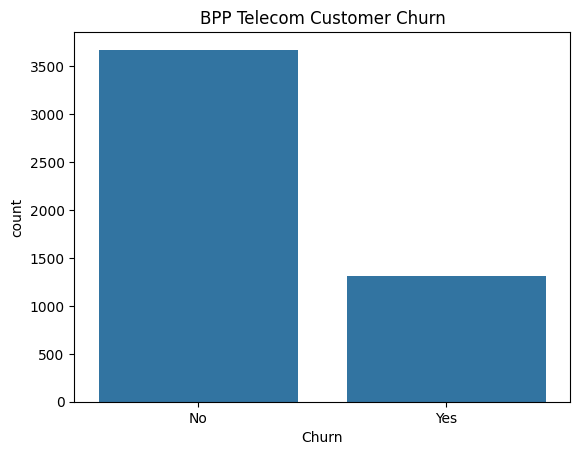

In [13]:
# Show the volume of the target variable ('Churn')
sns.countplot(x='Churn', data=joined_data)
plt.title("BPP Telecom Customer Churn")
plt.show()

In [14]:
# Create a target variable dataset
target_data = joined_data['Churn'].replace({'Yes':1, 'No':0})

#View target_data
target_data

0     0
1     0
2     0
3     0
4     0
     ..
81    1
82    1
83    1
84    0
85    0
Name: Churn, Length: 4986, dtype: int64

###Define features data

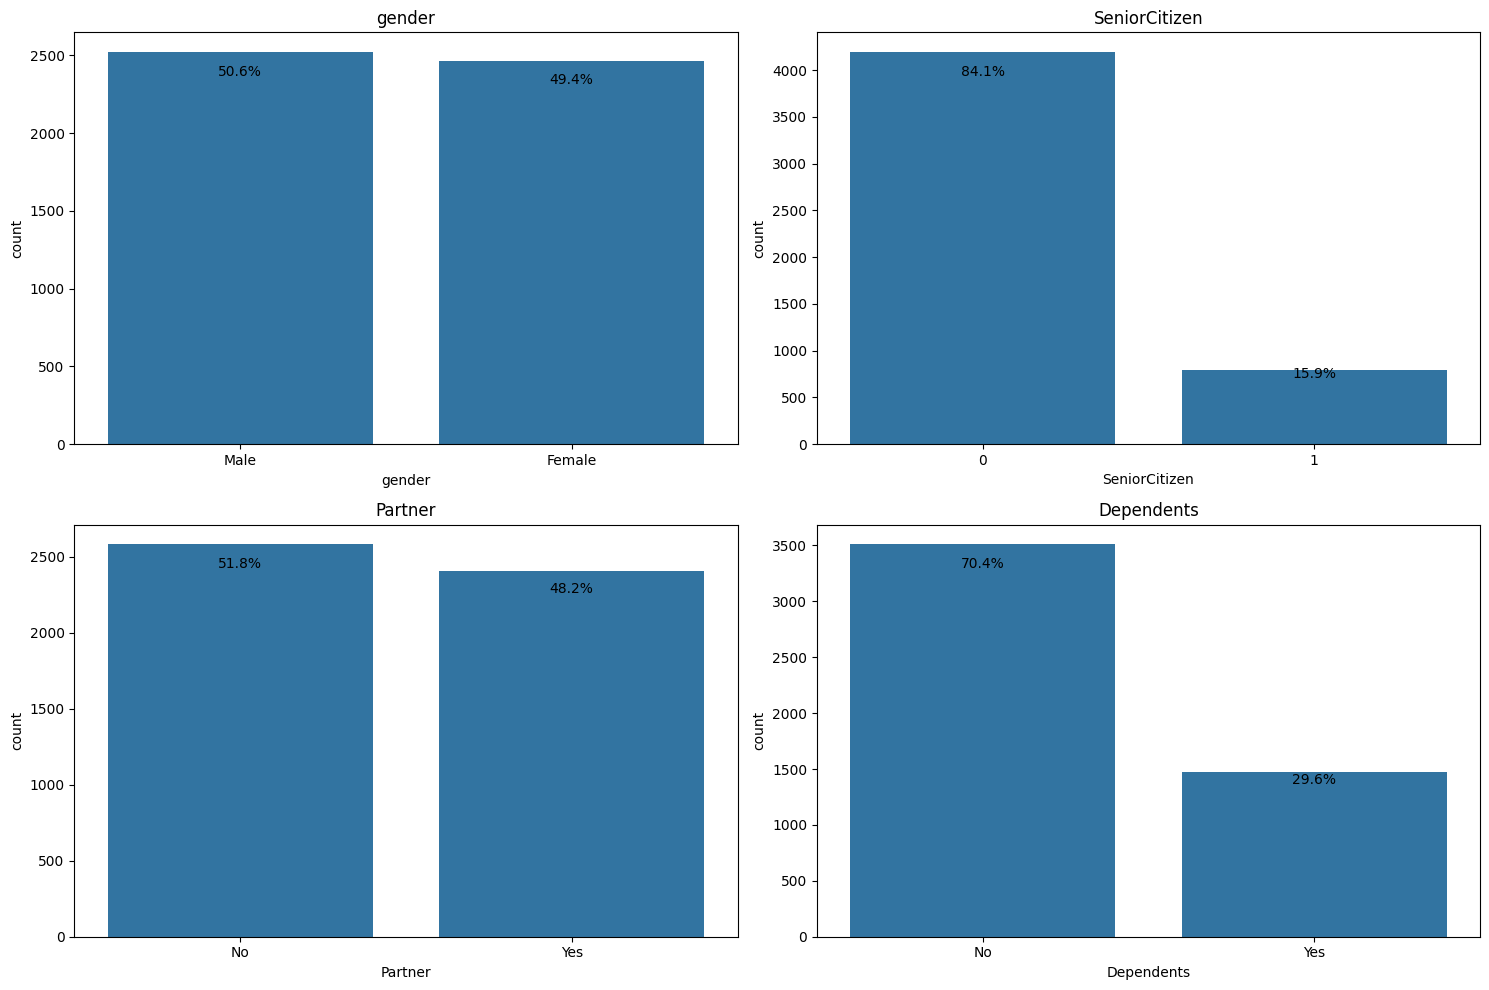

In [15]:
joined_data

# Assuming 'datc' is your DataFrame
# If not, replace 'datc' with your actual DataFrame name

def create_bar_plot(data, x_column, ax):
    # Create the bar plot
    sns.countplot(x=x_column, data=data, ax=ax)

    #Calculate percentages for each variable
    total = len(data)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() - (p.get_height() * 0.05)  #Adjust this value to position the text
        ax.annotate(percentage, (x, y), ha='center', va='center')

    ax.set_title(x_column)

# Create a grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10)) #Adjust subplots to how many plots you want displayed in the grid down & across. Use figsize to change the size of each of the plots.
axs = axs.flatten()

# Create each plot
create_bar_plot(joined_data, 'gender', axs[0])
create_bar_plot(joined_data, 'SeniorCitizen', axs[1])
create_bar_plot(joined_data, 'Partner', axs[2])
create_bar_plot(joined_data, 'Dependents', axs[3])

# Adjust layout and show plot
plt.tight_layout()
plt.show()



In [16]:
# Create features dataset and drop the columns not needed

features_data = joined_data.drop(['customerID'], axis=1)

features_data

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Male              0      No         No      34          Yes   
1   Female              1     Yes         No      71          Yes   
2   Female              0     Yes        Yes      70          Yes   
3   Female              0     Yes        Yes      52          Yes   
4     Male              0      No        Yes      69          Yes   
..     ...            ...     ...        ...     ...          ...   
81    Male              1      No         No       1          Yes   
82    Male              0     Yes        Yes      33          Yes   
83  Female              0     Yes         No      55          Yes   
84    Male              0     Yes        Yes      69          Yes   
85    Male              0      No         No       1          Yes   

   MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0            Yes     Fiber optic            Yes          Yes              Yes   
1            Yes     Fiber optic            Yes           No               No   
2            Yes             DSL            Yes           No               No   
3             No     Fiber optic            Yes           No              Yes   
4            Yes             DSL            Yes          Yes              Yes   
..           ...             ...            ...          ...              ...   
81           Yes     Fiber optic             No           No               No   
82            No             DSL             No           No              Yes   
83           Yes     Fiber optic             No           No              Yes   
84           Yes     Fiber optic             No           No               No   
85            No             DSL            Yes           No               No   

   TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          Yes         Yes             Yes        One year               No   
1           No          No              No        Two year              Yes   
2           No          No             Yes        One year               No   
3          Yes          No              No  Month-to-month              Yes   
4          Yes         Yes              No        Two year              Yes   
..         ...         ...             ...             ...              ...   
81          No          No              No  Month-to-month              Yes   
82         Yes         Yes             Yes        One year              Yes   
83          No          No              No  Month-to-month              Yes   
84         Yes         Yes             Yes        Two year              Yes   
85          No          No              No  Month-to-month              Yes   

                PaymentMethod  MonthlyCharges TotalCharges Churn  
0     Credit card (automatic)          116.25      3899.05    No  
1     Credit card (automatic)           80.70         5676    No  
2   Bank transfer (automatic)           65.20      4543.15    No  
3   Bank transfer (automatic)           84.05       4326.8    No  
4     Credit card (automatic)           79.45      5502.55    No  
..                        ...             ...          ...   ...  
81           Electronic check           73.65        73.65   Yes  
82               Mailed check           73.90      2405.05   Yes  
83           Electronic check           77.75      4458.15   Yes  
84           Electronic check           99.35      6856.45    No  
85               Mailed check           50.75        50.75    No  

[4986 rows x 20 columns]

###Convert Categorical data into counts
Use OneHotEncoder to convert some fields to numerical values to support EDA and model building.

In [17]:
# Initialise the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# List of features to encode
features_to_encode = ['gender', 'PhoneService', 'MultipleLines']

# Initialize an empty DataFrame to store all encoded features
df_encoded_all = pd.DataFrame()

# Encode each feature and add to df_encoded_all
for feature in features_to_encode:
    # Fit and transform the data
    encoded_data = encoder.fit_transform(features_data[[feature]])

    # Create a new dataframe with encoded data
    df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out([feature]))

    # Add to df_encoded_all
    df_encoded_all = pd.concat([df_encoded_all, df_encoded], axis=1)

# Reset index of both dataframes
df_encoded_all = df_encoded_all.reset_index(drop=True)
features_data = features_data.reset_index(drop=True)

# Concatenate the encoded columns with the original dataframe
features_data_encoded = pd.concat([features_data, df_encoded_all], axis=1)

print(features_data_encoded)


      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0       Male              0      No         No      34          Yes   
1     Female              1     Yes         No      71          Yes   
2     Female              0     Yes        Yes      70          Yes   
3     Female              0     Yes        Yes      52          Yes   
4       Male              0      No        Yes      69          Yes   
...      ...            ...     ...        ...     ...          ...   
4981    Male              1      No         No       1          Yes   
4982    Male              0     Yes        Yes      33          Yes   
4983  Female              0     Yes         No      55          Yes   
4984    Male              0     Yes        Yes      69          Yes   
4985    Male              0      No         No       1          Yes   

     MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0              Yes     Fiber optic            Yes          Yes  ...   
1    

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


###Create new columns based on condition
Use the values of multiple columns to create new columns.


*   Column called 'multi_occupancy' to show where there are multiple people living at one address based on if the customer is listed as having a partner or children.
*   Column called 'additional_services' to use all the columns that suggest the customer has bought or interacted with additional services.


In [18]:
#Create new column for multi_occupancy
def set_multi_occupancy(row):
    if row['Partner'] == 'Yes' or row['Dependents'] == 'Yes':
        return 1
    else:
        return 0

features_data_encoded['multi_occupancy'] = features_data_encoded.apply(set_multi_occupancy, axis=1)

#Create new column for additional_services
def set_add_service(row):
    if row['OnlineSecurity'] == 'Yes' or row['OnlineBackup'] == 'Yes' or row['DeviceProtection'] == 'Yes' or row['TechSupport'] == 'Yes' or row['StreamingTV'] == 'Yes' or row['StreamingMovies'] == 'Yes':
        return 1
    else:
        return 0

features_data_encoded['additional_services'] = features_data_encoded.apply(set_add_service, axis=1)

#Create new column for automatic_payment
def set_auto_payment(row):
    automatic_methods = ['Credit card (automatic)', 'Bank transfer (automatic)']
    if row['PaymentMethod'] in automatic_methods:
        return 1
    else:
        return 0

features_data_encoded['auto_payment'] = features_data_encoded.apply(set_auto_payment, axis=1)

#Create new column for Internet_High_Speed
def set_internet_high_speed(row):
    if row['InternetService'] == 'Fiber optic':
        return 1
    else:
        return 0

features_data_encoded['internet_high_speed'] = features_data_encoded.apply(set_internet_high_speed, axis=1)

#Create new column for Internet_Service
def set_internet_service(row):
    if row['InternetService'] != 'No':
        return 1
    else:
        return 0

features_data_encoded['internet_service'] = features_data_encoded.apply(set_internet_service, axis=1)

#Create new column for Contract_Monthly
def set_contract_monthly(row):
    if row['Contract'] == 'Month-to-month':
        return 1
    else:
        return 0

features_data_encoded['contract_monthly'] = features_data_encoded.apply(set_contract_monthly, axis=1)

features_data_encoded

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0       Male              0      No         No      34          Yes   
1     Female              1     Yes         No      71          Yes   
2     Female              0     Yes        Yes      70          Yes   
3     Female              0     Yes        Yes      52          Yes   
4       Male              0      No        Yes      69          Yes   
...      ...            ...     ...        ...     ...          ...   
4981    Male              1      No         No       1          Yes   
4982    Male              0     Yes        Yes      33          Yes   
4983  Female              0     Yes         No      55          Yes   
4984    Male              0     Yes        Yes      69          Yes   
4985    Male              0      No         No       1          Yes   

     MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0              Yes     Fiber optic            Yes          Yes  ...   
1              Yes     Fiber optic            Yes           No  ...   
2              Yes             DSL            Yes           No  ...   
3               No     Fiber optic            Yes           No  ...   
4              Yes             DSL            Yes          Yes  ...   
...            ...             ...            ...          ...  ...   
4981           Yes     Fiber optic             No           No  ...   
4982            No             DSL             No           No  ...   
4983           Yes     Fiber optic             No           No  ...   
4984           Yes     Fiber optic             No           No  ...   
4985            No             DSL            Yes           No  ...   

     PhoneService_Yes MultipleLines_No MultipleLines_No phone service  \
0                 1.0              0.0                            0.0   
1                 1.0              0.0                            0.0   
2                 1.0              0.0                            0.0   
3                 1.0              1.0                            0.0   
4                 1.0              0.0                            0.0   
...               ...              ...                            ...   
4981              1.0              0.0                            0.0   
4982              1.0              1.0                            0.0   
4983              1.0              0.0                            0.0   
4984              1.0              0.0                            0.0   
4985              1.0              1.0                            0.0   

     MultipleLines_Yes multi_occupancy additional_services auto_payment  \
0                  1.0               0                   1            1   
1                  1.0               1                   1            1   
2                  1.0               1                   1            1   
3                  0.0               1                   1            1   
4                  1.0               1                   1            1   
...                ...             ...                 ...          ...   
4981               1.0               0                   0            0   
4982               0.0               1                   1            0   
4983               1.0               1                   1            0   
4984               1.0               1                   1            0   
4985               0.0               0                   1            0   

      internet_high_speed internet_service contract_monthly  
0                       1                1                0  
1                       1                1                0  
2                       0                1                0  
3                       1                1                1  
4                       0                1                0  
...                   ...              ...              ...  
4981                    1                1                1  
4982                    0 

###Drop columns not needed & create smaller dataset
Drop all the columns where we've converted them into numerical columns, the columns won't be used in analysis e.g. paperless billing, and where we only need the one hot encoded column that captures 'Yes' e.g. Multiple Lines.

In [19]:
# Drop columns no longer needed due to new fields created

features_data_encoded = features_data_encoded.drop(['Partner','Dependents','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','TotalCharges','PaymentMethod','MultipleLines','PhoneService','PaperlessBilling','MultipleLines_No','MultipleLines_No phone service','InternetService','Contract','gender_Male'], axis=1)

# Rename MultipleLines_Yes to MultipleLines
features_data_encoded = features_data_encoded.rename(columns={'MultipleLines_Yes': 'MultipleLines'})

features_data_encoded

gender  SeniorCitizen  tenure  MonthlyCharges Churn  gender_Female  \
0       Male              0      34          116.25    No            0.0   
1     Female              1      71           80.70    No            1.0   
2     Female              0      70           65.20    No            1.0   
3     Female              0      52           84.05    No            1.0   
4       Male              0      69           79.45    No            0.0   
...      ...            ...     ...             ...   ...            ...   
4981    Male              1       1           73.65   Yes            0.0   
4982    Male              0      33           73.90   Yes            0.0   
4983  Female              0      55           77.75   Yes            1.0   
4984    Male              0      69           99.35    No            0.0   
4985    Male              0       1           50.75    No            0.0   

      PhoneService_No  PhoneService_Yes  MultipleLines  multi_occupancy  \
0                 0.0               1.0            1.0                0   
1                 0.0               1.0            1.0                1   
2                 0.0               1.0            1.0                1   
3                 0.0               1.0            0.0                1   
4                 0.0               1.0            1.0                1   
...               ...               ...            ...              ...   
4981              0.0               1.0            1.0                0   
4982              0.0               1.0            0.0                1   
4983              0.0               1.0            1.0                1   
4984              0.0               1.0            1.0                1   
4985              0.0               1.0            0.0                0   

      additional_services  auto_payment  internet_high_speed  \
0                       1             1                    1   
1                       1             1                    1   
2                       1             1                    0   
3                       1             1                    1   
4                       1             1                    0   
...                   ...           ...                  ...   
4981                    0             0                    1   
4982                    1             0                    0   
4983                    1             0                    1   
4984                    1             0                    1   
4985                    1             0                    0   

      internet_service  contract_monthly  
0                    1                 0  
1                    1                 0  
2                    1                 0  
3                    1                 1  
4                    1                 0  
...                ...               ...  
4981                 1                 1  
4982                 1                 0  
4983                 1                 1  
4984                 1                 0  
4985                 1                 1  

[4986 rows x 15 columns]

In [20]:
# Re-alias dataframes into features (X) and target variable (y)
X = features_data_encoded
y = target_data

# Split the data into train & test data. Common split ratios are 80/20 or 70/30 (train/test). In this step 20% of the data has been selected as test data using test_size=0.2. The 'random_state' parameter ensures reproducibility, you can use any integer here. Stratify=y is used as an additional parameter in train_test_split to ensure that the proportion of samples for each class is roughly the same in both train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [21]:
# Check the shapes of the test & train datasets:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)



Training set shape: (3988, 15)
Test set shape: (998, 15)


##**Exploratory Data Analysis**

Exploratory Data Analysis (EDA) is essential for identifying patterns and relationships in data, testing assumptions, informing feature selection and engineering. Although we've done some early data cleansing, we may find further errors in the data which would be critical to address before further analysis and going onto build our model.

This section will include data visualisations and statistical summaries to supprot revealing patterns and relationships between variables, to enable more effective feature engineering and model building.

*The python libaries used within this section are...I have selected them because...*


---



From the Churn dataset, we can see that 26% of customers are leaving BPP Telecomms.

In [22]:
# Check if target_data is a DataFrame
if isinstance(y_train, pd.Series):
    # If it's a Series, convert it to a DataFrame
    target_data = y_train.to_frame()

# Print information about the DataFrame
print("DataFrame Info:")
print(y_train.info())

# Check if 'Churn' column exists
if 'Churn' in target_data.columns:
    # Calculate percentages
    churn_counts = target_data['Churn'].value_counts()
    total_entries = len(y_train)
    churn_percentages = (churn_counts / total_entries) * 100

    # Create a new DataFrame with the results
    churn_analysis = pd.DataFrame({
        'Count': churn_counts,
        'Percentage': churn_percentages
    })

    # Display the results
    print("\nChurn Analysis:")
    print(churn_analysis)
else:
    print("\nThe 'Churn' column does not exist in the dataset.")
    print("Available columns are:", list(target_data.columns))


DataFrame Info:
<class 'pandas.core.series.Series'>
Index: 3988 entries, 679 to 884
Series name: Churn
Non-Null Count  Dtype
--------------  -----
3988 non-null   int64
dtypes: int64(1)
memory usage: 62.3 KB
None

Churn Analysis:
       Count  Percentage
Churn                   
0       2937   73.645938
1       1051   26.354062


###Tenure and Monthly Charges

When exploring the tenure of the customer base:


*   On average, customers have had a tenure of 32 months. The highest 25% of customers have been with the BPP Telecomms between 56 months and 76 months.
*   The minimum tenure is 0 months, and the lowest 25% of customers have been with BPP Telecomms for under 9 months.
*   On average, customers are charged £64.93 per month. The highest 25% of customers are charged between £89.95 and £118.75.
*   The minimum charge is £18.25, with the lowest 25% of customers paying up to £25.38.



In [23]:
#Define which columns to focus on
values_data = ["tenure","MonthlyCharges"]

#Provide some basic stats to support the descriptive summary above.
X_train[values_data].describe()

tenure  MonthlyCharges
count  3988.000000     3988.000000
mean     32.443330       64.937688
std      24.661522       30.161817
min       0.000000       18.250000
25%       9.000000       35.387500
50%      29.000000       70.550000
75%      56.000000       89.950000
max      72.000000      118.750000

In [24]:
#Set up a boxplot
def Outlier_boxplot(df, col):
    """ Display boxplot for given column """
    sns.boxplot(x=df[col])
    plt.show()

We can see from plotting both the tenure and the monthly charges on box plot charts that neither have outliers.

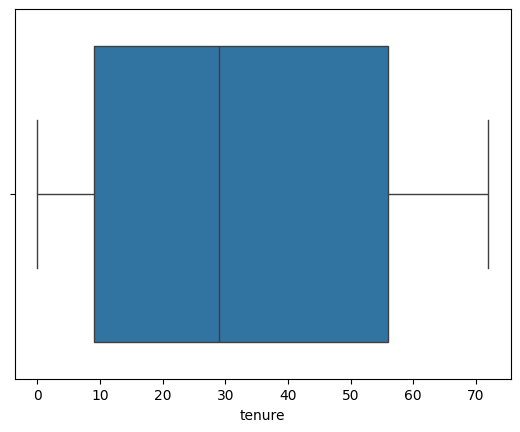

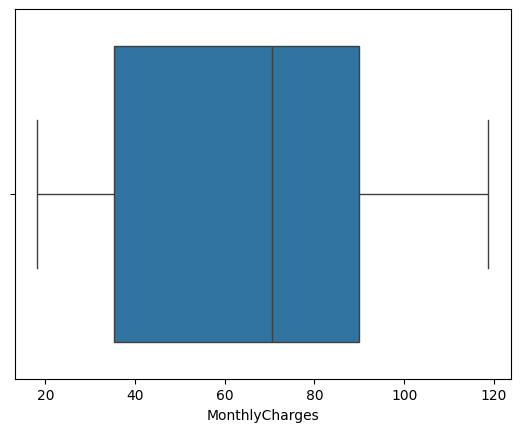

In [25]:
 #Create boxplots using the tenure & monthly charge data
for i in values_data:
    Outlier_boxplot(X_train,i)

And from the below scatter plot, we can see that the customers that have left have a range between 0 - 72 months. A large proportion of customers have either been had the shortest (1 month) or longest (72 month) tenure.

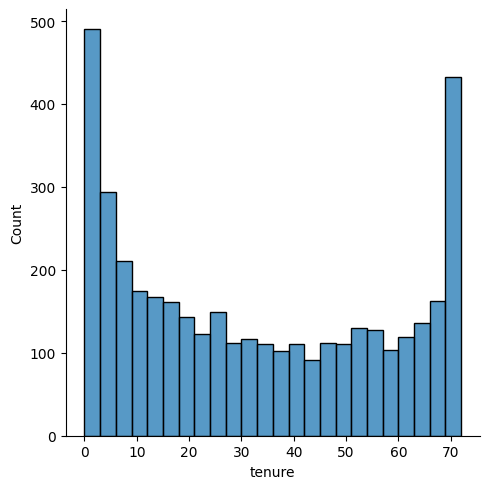

In [26]:
sns.displot(X_train, x="tenure", binwidth=3);

There are a large volume of customers that have low rates. Excluding this bar, the Monthly Charges seems to be normally distributed, roughly distributed around £80 per month.


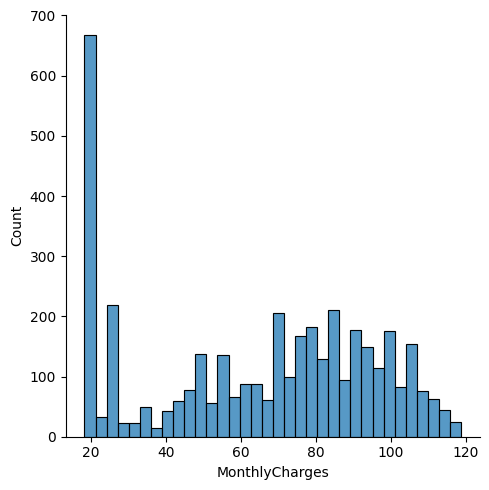

In [27]:
sns.displot(X_train, x="MonthlyCharges", binwidth=3);

###Age Profile

Ideally we would have had the age of the customer to understand the full age profile, but in this case we've been provided with senior citizen as a indicator. I will understand what proportion of my data is a senior citizen and what proportion of churn senior citzens have.

In [28]:
# Count the number of occurrences of each value in the 'SeniorCitizen' column
value_counts = X_train['SeniorCitizen'].value_counts()

print("Counts of each value in the 'SeniorCitizen' column:")
print(value_counts)

Counts of each value in the 'SeniorCitizen' column:
SeniorCitizen
0    3340
1     648
Name: count, dtype: int64


When reviewing the distribution of 2 cohorts; customers that churn vs. customers that do not churn, we found that the higher % that are senior citizens are customers that leave BPP Telecomm. 25.9% of customers that leave are senior citizens.

In [29]:
# Create a copy of X_train to avoid modifying the original data
X_train_copy = X_train.copy()

# Rename SeniorCitizen values
X_train_copy['SeniorCitizen'] = X_train_copy['SeniorCitizen'].map({1: 'Yes', 0: 'No'})

# Calculate percentages for each combination of Churn and SeniorCitizen
grouped = X_train_copy.groupby(['Churn', 'SeniorCitizen']).size().reset_index(name='Count')
total_counts = X_train_copy.groupby('Churn').size().reset_index(name='Total')
percentages = pd.merge(grouped, total_counts, on='Churn')
percentages['Percentage'] = (percentages['Count'] / percentages['Total']) * 100

# Update color mapping
color = {'No': 'grey', 'Yes': 'red'}

fig = px.histogram(X_train_copy,
                   x="Churn",
                   color="SeniorCitizen",
                   barmode="stack",
                   color_discrete_map=color)

fig.update_layout(
    width=700,
    height=500,
    bargap=0.1,
    title='Churn distribution by Senior Citizen'
)

# Add percentage annotations
for churn in X_train_copy['Churn'].unique():
    y_offset = 0
    for senior_citizen in ['Yes', 'No']:  # Process 'Yes' (red) first, then 'No' (grey)
        row = percentages[(percentages['Churn'] == churn) & (percentages['SeniorCitizen'] == senior_citizen)]
        if not row.empty:
            count = row['Count'].values[0]
            percentage = row['Percentage'].values[0]
            y_position = y_offset + (count / 2)  # Center the label in the bar segment
            fig.add_annotation(
                x=churn,
                y=y_position,
                text=f"{percentage:.1f}%",
                showarrow=False,
                font=dict(color="white" if senior_citizen == 'Yes' else "black")
            )
            y_offset += count  # Update offset for the next segment

fig.show()


###Churn by Gender

Determine the percentage of citizens by Gender that churn compared to the overall customer base.

In [30]:
# Count the number of occurrences of each value in the 'Gender' column
value_counts = X_train['gender'].value_counts()

print("Counts of each value in the 'Gender' column:")
print(value_counts)

Counts of each value in the 'Gender' column:
gender
Male      2017
Female    1971
Name: count, dtype: int64


We can see that gender is evenly distributed over both the customers that churn and do not churn, therefore gender is an unlikely indicator to inform if a customer will choose to leave. Instead, this distribution probably matches the customer base and associated population.

In [31]:
# Create a copy of X_train to avoid modifying the original data
X_train_copy = X_train.copy()

# Rename gender_Female values (1 is Female and 0 is Male)
X_train_copy['gender_Female'] = X_train_copy['gender_Female'].map({1: 'Female', 0: 'Male'})

# Calculate percentages for each combination of Churn and gender_Female
grouped = X_train_copy.groupby(['Churn', 'gender_Female']).size().reset_index(name='Count')
total_counts = X_train_copy.groupby('Churn').size().reset_index(name='Total')
percentages = pd.merge(grouped, total_counts, on='Churn')
percentages['Percentage'] = (percentages['Count'] / percentages['Total']) * 100

# Update color mapping
color = {'Male': 'SteelBlue', 'Female': 'MistyRose'}

fig = px.histogram(X_train_copy,
                   x="Churn",
                   color="gender_Female",
                   barmode="stack",
                   color_discrete_map=color)

fig.update_layout(
    width=700,
    height=500,
    bargap=0.1,
    title='Churn distribution by Gender',
    legend_title_text='Gender'  # This line changes the legend title
)

# Add percentage annotations
for churn in X_train_copy['Churn'].unique():
    y_offset = 0
    for gender in ['Female', 'Male']:  # Process 'Female' first, then 'Male'
        row = percentages[(percentages['Churn'] == churn) & (percentages['gender_Female'] == gender)]
        if not row.empty:
            count = row['Count'].values[0]
            percentage = row['Percentage'].values[0]
            y_position = y_offset + (count / 2)  # Center the label in the bar segment
            fig.add_annotation(
                x=churn,
                y=y_position,
                text=f"{percentage:.1f}%",
                showarrow=False,
                font=dict(color="white" if gender == 'Female' else "black")
            )
            y_offset += count  # Update offset for the next segment

fig.show()


###Churn by Internet Service

When exploring Internet Service, we've looked at the customers that have a internet service as part of their contract, and of those, which customers have a high speed connection (Fiber).

In [32]:
# Count the number of occurrences of each value in the 'internetservice' column
value_counts1 = X_train['internet_service'].value_counts()

print("Counts of each value in the 'internetservice' column:")
print(value_counts1)

# Count the number of occurrences of each value in the 'internet_high_speed' column
value_counts2 = X_train['internet_high_speed'].value_counts()

print("Counts of each value in the 'internet_high_speed' column:")
print(value_counts2)

Counts of each value in the 'internetservice' column:
internet_service
1    3118
0     870
Name: count, dtype: int64
Counts of each value in the 'internet_high_speed' column:
internet_high_speed
0    2225
1    1763
Name: count, dtype: int64


Of the customers which churn, 94 in 100 customers have a internet service with BPP Telecomm. A higher proportion of patients without internet service stay with the company as customers.

In [33]:
# Create a copy of X_train to avoid modifying the original data
X_train_copy = X_train.copy()

# Calculate percentages for each combination of Churn and internet_service
grouped = X_train_copy.groupby(['Churn', 'internet_service']).size().reset_index(name='Count')
total_counts = X_train_copy.groupby('Churn').size().reset_index(name='Total')
percentages = pd.merge(grouped, total_counts, on='Churn')
percentages['Percentage'] = (percentages['Count'] / percentages['Total']) * 100

# Get unique internet_service values
internet_services = X_train_copy['internet_service'].unique()

# Define colour mapping for internet_service
color_map = {
    internet_services[0]: 'darkseagreen',  # First category
    internet_services[1]: 'cornsilk'     # Second category
}

fig = px.histogram(X_train_copy,
                   x="Churn",
                   color="internet_service",
                   barmode="stack",
                   color_discrete_map=color_map)

fig.update_layout(
    width=700,
    height=500,
    bargap=0.1,
    title='Churn distribution by Internet Service',
    legend_title_text='Internet Service'
)

# Add percentage annotations
for churn in X_train_copy['Churn'].unique():
    y_offset = 0
    for service in internet_services:
        row = percentages[(percentages['Churn'] == churn) & (percentages['internet_service'] == service)]
        if not row.empty:
            count = row['Count'].values[0]
            percentage = row['Percentage'].values[0]
            y_position = y_offset + (count / 2)  # Center the label in the bar segment
            fig.add_annotation(
                x=churn,
                y=y_position,
                text=f"{percentage:.1f}%",
                showarrow=False,
                font=dict(color="black")  # Changed to black for better visibility on all colors
            )
            y_offset += count  # Update offset for the next segment

fig.show()


68.9% of customers have a high speed internet service when they churn. This distribution differs to the customers that do not churn, which is 35.4%.

In [34]:
# Create a copy of X_train to avoid modifying the original data
X_train_copy = X_train.copy()

# Calculate percentages for each combination of Churn and internet_high_speed
grouped = X_train_copy.groupby(['Churn', 'internet_high_speed']).size().reset_index(name='Count')
total_counts = X_train_copy.groupby('Churn').size().reset_index(name='Total')
percentages = pd.merge(grouped, total_counts, on='Churn')
percentages['Percentage'] = (percentages['Count'] / percentages['Total']) * 100

# Get unique internet_high_speed values
internet_high_speeds = X_train_copy['internet_high_speed'].unique()

# Define colour mapping for internet_high_speed
color_map = {
    internet_high_speeds[0]: 'darkseagreen',  # First category
    internet_high_speeds[1]: 'cornsilk'     # Second category
}

fig = px.histogram(X_train_copy,
                   x="Churn",
                   color="internet_high_speed",
                   barmode="stack",
                   color_discrete_map=color_map)

fig.update_layout(
    width=700,
    height=500,
    bargap=0.1,
    title='Churn distribution by High Speed Internet Service',
    legend_title_text='High Speed Internet Service'
)

# Add percentage annotations
for churn in X_train_copy['Churn'].unique():
    y_offset = 0
    for service in internet_high_speeds:
        row = percentages[(percentages['Churn'] == churn) & (percentages['internet_high_speed'] == service)]
        if not row.empty:
            count = row['Count'].values[0]
            percentage = row['Percentage'].values[0]
            y_position = y_offset + (count / 2)  # Center the label in the bar segment
            fig.add_annotation(
                x=churn,
                y=y_position,
                text=f"{percentage:.1f}%",
                showarrow=False,
                font=dict(color="black")  # Changed to black for better visibility on all colors
            )
            y_offset += count  # Update offset for the next segment

fig.show()


###Churn by Additional Services

Additional services (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport) have been bundled into 1 indicator to compare against customer churn. The churn rate for customers with these services is 75%, which in comparison to those that stay, is slightly higher.

In [35]:
# Create a copy of X_train to avoid modifying the original data
X_train_copy = X_train.copy()

# Calculate percentages for each combination of Churn and additional_services
grouped = X_train_copy.groupby(['Churn', 'additional_services']).size().reset_index(name='Count')
total_counts = X_train_copy.groupby('Churn').size().reset_index(name='Total')
percentages = pd.merge(grouped, total_counts, on='Churn')
percentages['Percentage'] = (percentages['Count'] / percentages['Total']) * 100

# Get unique additional_services values
additional_servicess = X_train_copy['additional_services'].unique()

# Define colour mapping for additional_services
color_map = {
    additional_servicess[0]: 'darkseagreen',  # First category
    additional_servicess[1]: 'cornsilk'     # Second category
}

fig = px.histogram(X_train_copy,
                   x="Churn",
                   color="additional_services",
                   barmode="stack",
                   color_discrete_map=color_map)

fig.update_layout(
    width=700,
    height=500,
    bargap=0.1,
    title='Churn distribution by Additional Services',
    legend_title_text='Additional Services'
)

# Add percentage annotations
for churn in X_train_copy['Churn'].unique():
    y_offset = 0
    for service in additional_servicess:
        row = percentages[(percentages['Churn'] == churn) & (percentages['additional_services'] == service)]
        if not row.empty:
            count = row['Count'].values[0]
            percentage = row['Percentage'].values[0]
            y_position = y_offset + (count / 2)  # Center the label in the bar segment
            fig.add_annotation(
                x=churn,
                y=y_position,
                text=f"{percentage:.1f}%",
                showarrow=False,
                font=dict(color="black")  # Changed to black for better visibility on all colors
            )
            y_offset += count  # Update offset for the next segment

fig.show()


###Churn by Contract Type

88% of customers that churn are on a month-to-month contract. This could indicate that a high volume of customers that leave are on month-to-month contracts, which is double the proportion of those that stay with BPP Telecomms.

In [36]:
# Create a copy of X_train to avoid modifying the original data
X_train_copy = X_train.copy()

# Calculate percentages for each combination of Churn and contract_monthly
grouped = X_train_copy.groupby(['Churn', 'contract_monthly']).size().reset_index(name='Count')
total_counts = X_train_copy.groupby('Churn').size().reset_index(name='Total')
percentages = pd.merge(grouped, total_counts, on='Churn')
percentages['Percentage'] = (percentages['Count'] / percentages['Total']) * 100

# Get unique contract_monthly values
contract_monthlys = X_train_copy['contract_monthly'].unique()

# Define colour mapping for contract_monthly
color_map = {
    contract_monthlys[0]: 'darkseagreen',  # First category
    contract_monthlys[1]: 'cornsilk'     # Second category
}

fig = px.histogram(X_train_copy,
                   x="Churn",
                   color="contract_monthly",
                   barmode="stack",
                   color_discrete_map=color_map)

fig.update_layout(
    width=700,
    height=500,
    bargap=0.1,
    title='Churn distribution by Monthly Contract',
    legend_title_text='Monthly Contract'
)

# Add percentage annotations
for churn in X_train_copy['Churn'].unique():
    y_offset = 0
    for service in contract_monthlys:
        row = percentages[(percentages['Churn'] == churn) & (percentages['contract_monthly'] == service)]
        if not row.empty:
            count = row['Count'].values[0]
            percentage = row['Percentage'].values[0]
            y_position = y_offset + (count / 2)  # Center the label in the bar segment
            fig.add_annotation(
                x=churn,
                y=y_position,
                text=f"{percentage:.1f}%",
                showarrow=False,
                font=dict(color="black")  # Changed to black for better visibility on all colors
            )
            y_offset += count  # Update offset for the next segment

fig.show()


### Churn by Payment Method

Explore the relationship between the customer's payment method and churn. One approach could be to calculate the churn rate for each payment method. Consider using a pie chart or bar plot to display your findings. Additionally, it might be interesting to explore whether automatic payment methods (bank transfer or credit card) have different churn rates compared to non-automatic methods (electronic check or mailed check).

74.1% of customers that churn are not using a automated payment method. A higher proportion of patients that stay use an automated payment e.g. bank transfer or credit card.

In [37]:
# Create a copy of X_train to avoid modifying the original data
X_train_copy = X_train.copy()

# Calculate percentages for each combination of Churn and auto_payment
grouped = X_train_copy.groupby(['Churn', 'auto_payment']).size().reset_index(name='Count')
total_counts = X_train_copy.groupby('Churn').size().reset_index(name='Total')
percentages = pd.merge(grouped, total_counts, on='Churn')
percentages['Percentage'] = (percentages['Count'] / percentages['Total']) * 100

# Get unique auto_payment values
auto_payments = X_train_copy['auto_payment'].unique()

# Define colour mapping for auto_payment
color_map = {
    auto_payments[1]: 'darkseagreen',  # First category
    auto_payments[0]: 'cornsilk'     # Second category
}

fig = px.histogram(X_train_copy,
                   x="Churn",
                   color="auto_payment",
                   barmode="stack",
                   color_discrete_map=color_map)

fig.update_layout(
    width=700,
    height=500,
    bargap=0.1,
    title='Churn distribution by Automated payment',
    legend_title_text='Automated payment'
)

# Add percentage annotations
for churn in X_train_copy['Churn'].unique():
    y_offset = 0
    for service in auto_payments:
        row = percentages[(percentages['Churn'] == churn) & (percentages['auto_payment'] == service)]
        if not row.empty:
            count = row['Count'].values[0]
            percentage = row['Percentage'].values[0]
            y_position = y_offset + (count / 2)  # Center the label in the bar segment
            fig.add_annotation(
                x=churn,
                y=y_position,
                text=f"{percentage:.1f}%",
                showarrow=False,
                font=dict(color="black")  # Changed to black for better visibility on all colors
            )
            y_offset += count  # Update offset for the next segment

fig.show()


## Build a model to predict Churn

Use the cleaned and processed data to construct a predictive model that forecasts customer churn based on their profile and usage patterns. Provide a thorough explanation of the rationale behind your choice of model, the features you've decided to use, and the process you followed to develop the model.
Your data should have been split into training and test sets during the previous exercise in task C. Now use the training data to train your model and then evaluate the output against the test data. Discuss the performance of your model, any challenges you faced, and how you tackled them. Also, explain the metrics you used to evaluate your model's performance (e.g., accuracy, AUC/ROC, F1, ect.)

Notebook correctly uses a package to achieve prediction for the churn status, with very detailed explanation and comments about the method used, the rationale behind the prediction algorithm, including example of the prediction in action for a new mock customer entry.

We have tried 7 different machine learning algorithms using default parameters to then select the classification model that can predict the highest % of customers that churn:

*   Logistic Regression
*   Decision Tree
*   Random Forest
*   K-Nearest Neighbors
*   AdaBoost Classifier
*   Gradient Boost Classifier
*   Extra Tree Classifier

Different algorithms have varying strengths and weaknesses. By implementing multiple models, we can compare their performance to find the best one for our dataset and business problem.

Some algorithms work better than others depending on the characteristics of the dataset.

This approach helps ensure that we're leveraging the strengths of various algorithms to achieve the best possible predictive performance for our use case.


In [38]:
# Drop columns no longer required that we included to support EDA

X_train = X_train.drop(['gender','Churn'], axis=1)
X_test = X_test.drop(['gender','Churn'], axis=1)

**Understanding the metrics**

For each model, we have:

*   Accuracy: The overall percentage of correct predictions.
*   Precision: How often the model is correct when it predicts a specific category.
*   Recall: How often the model correctly identifies all instances of a specific category.
*   F1-score: A balance between precision and recall.
*   Confusion Matrix: Shows correct and incorrect predictions for each category.

In [ ]:
# Define the models
models = {
    'Extra Trees': make_pipeline(StandardScaler(), ExtraTreesClassifier(random_state=42)),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': make_pipeline(StandardScaler(), LogisticRegression(random_state=42)),
    'K-Nearest Neighbors': make_pipeline(StandardScaler(), KNeighborsClassifier()),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Dictionary to store results
results = {}

# Function to evaluate model
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        'accuracy': accuracy,
        'report': report,
        'confusion_matrix': cm
    }

# Evaluate all models
for name, model in models.items():
    evaluate_model(model, name)

# Print results
for name, result in results.items():
    print(f"\n{name}:")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print("\nClassification Report:")
    for label, metrics in result['report'].items():
        if isinstance(metrics, dict):
            print(f"{label:>20s}: Precision: {metrics['precision']:.4f}, "
                  f"Recall: {metrics['recall']:.4f}, F1-score: {metrics['f1-score']:.4f}")

    print("\nConfusion Matrix:")
    print(result['confusion_matrix'])


Extra Trees:
Accuracy: 0.7625

Classification Report:
                   0: Precision: 0.8234, Recall: 0.8626, F1-score: 0.8425
                   1: Precision: 0.5570, Recall: 0.4829, F1-score: 0.5173
           macro avg: Precision: 0.6902, Recall: 0.6727, F1-score: 0.6799
        weighted avg: Precision: 0.7532, Recall: 0.7625, F1-score: 0.7568

Confusion Matrix:
[[634 101]
 [136 127]]

Gradient Boosting:
Accuracy: 0.8166

Classification Report:
                   0: Precision: 0.8433, Recall: 0.9224, F1-score: 0.8811
                   1: Precision: 0.7062, Recall: 0.5209, F1-score: 0.5996
           macro avg: Precision: 0.7747, Recall: 0.7217, F1-score: 0.7403
        weighted avg: Precision: 0.8072, Recall: 0.8166, F1-score: 0.8069

Confusion Matrix:
[[678  57]
 [126 137]]

Logistic Regression:
Accuracy: 0.8166

Classification Report:
                   0: Precision: 0.8485, Recall: 0.9143, F1-score: 0.8802
                   1: Precision: 0.6942, Recall: 0.5437, F1-score: 0.60

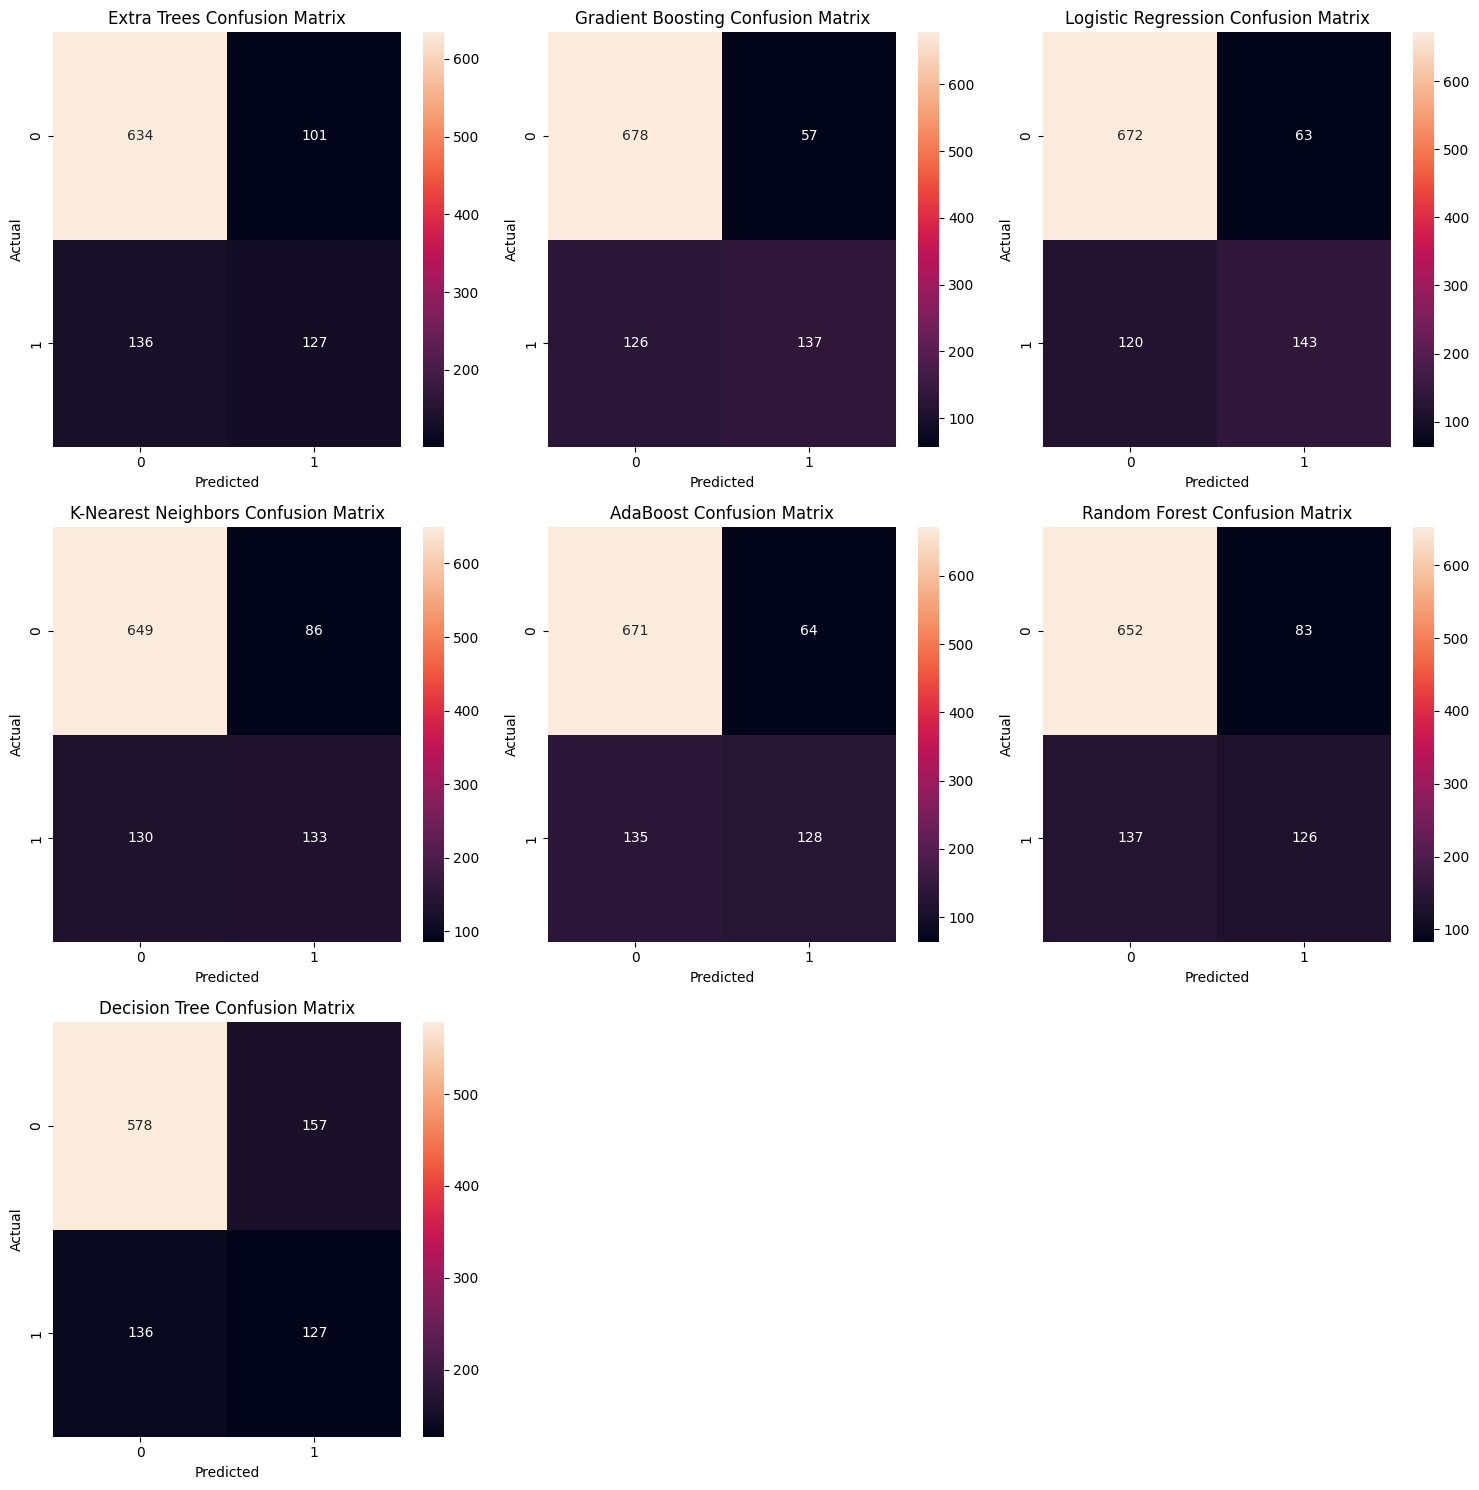

In [52]:
# Visualise confusion matrices
n_models = len(models)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, (name, result) in enumerate(results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', ax=axes[i])
    axes[i].set_title(f'{name} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

# Remove the last empty subplot
axes[-1].remove()
axes[-2].remove()

plt.tight_layout()
plt.show()


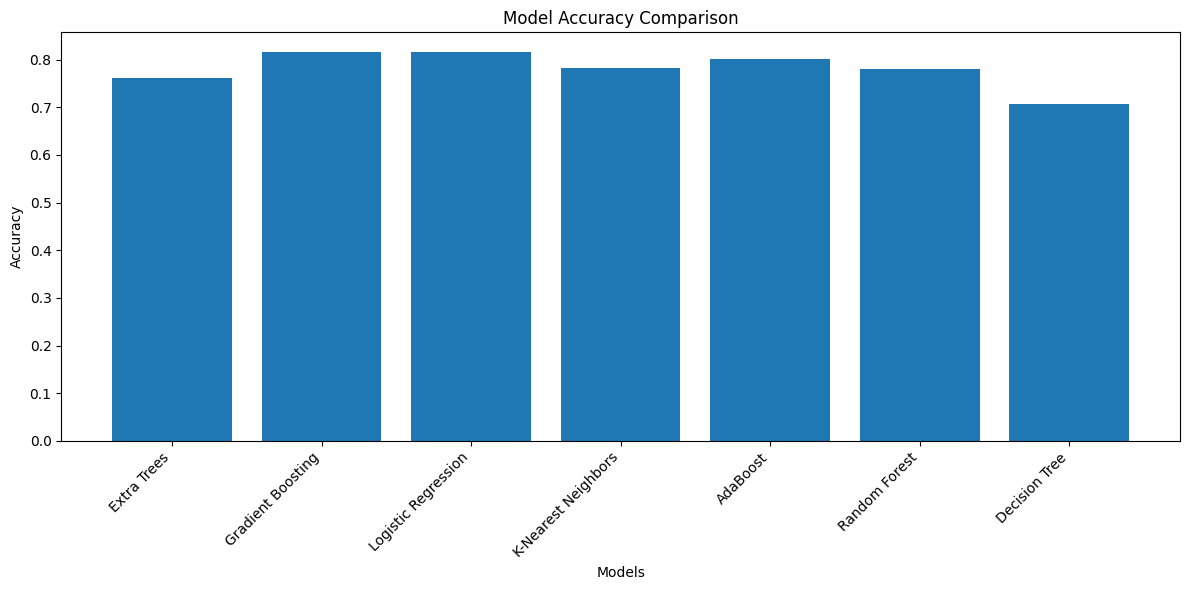

In [42]:
# Visualise accuracy comparison
accuracies = [result['accuracy'] for result in results.values()]
plt.figure(figsize=(12, 6))
plt.bar(results.keys(), accuracies)
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##Evaluate the model built to predict Churn

The models are classifying data into two categories (0 and 1). The accuracy score shows how often the model correctly predicts the category. Higher accuracy is better.

*   Gradient Boosting and Logistic Regression performed best with 81.66% accuracy.
*   K-Nearest Neighbors, AdaBoost, and Random Forest were close behind.
*   Extra Trees and Decision Tree had lower accuracy.


**Model Strengths**

1. All models are better at predicting category 0 than category 1.
2. Gradient Boosting and Logistic Regression have the best balance of performance for both categories.
3. Extra Trees and Decision Tree struggle more with category 1.

**Conclusion**

Whilst Gradient Boosting and Logistic Regression perform best overall, we are aiming to correctly identify how many customers churn, and therfore selecting Gradient Boosting as it has the highest precision (0.7062) and F1-score (0.5996).

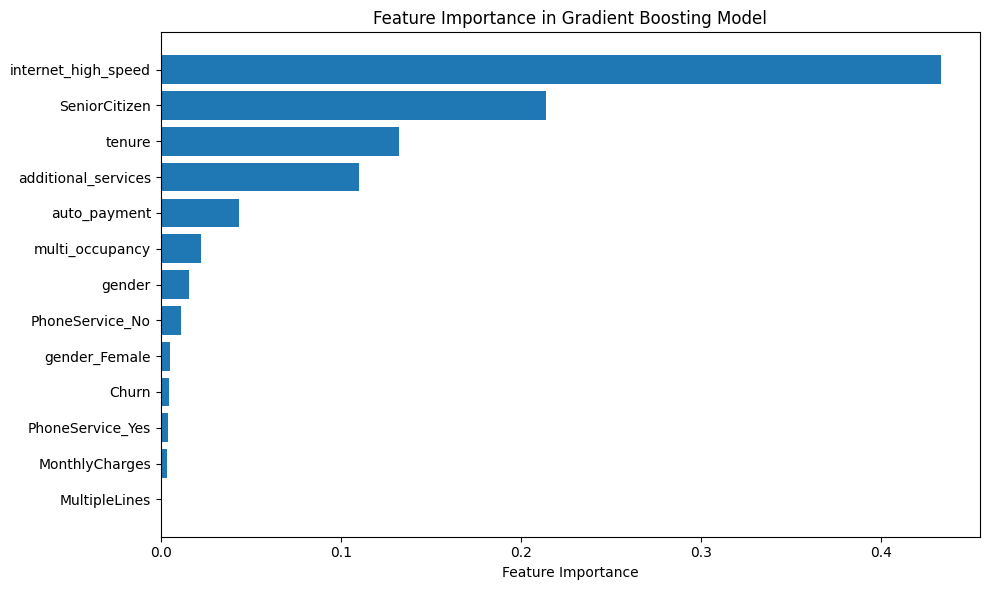

In [58]:
from sklearn.inspection import PartialDependenceDisplay

# Assuming X and y are your feature matrix and target vector
# And that X_train, X_test, y_train, y_test are already defined

# Get the Gradient Boosting model
gb_model = models['Gradient Boosting']

# Fit the model if not already fitted
gb_model.fit(X_train, y_train)

# Feature Importance Plot
feature_importance = gb_model.feature_importances_
feature_names = X.columns  # Assuming X is a pandas DataFrame

plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Gradient Boosting Model')
plt.tight_layout()
plt.show()


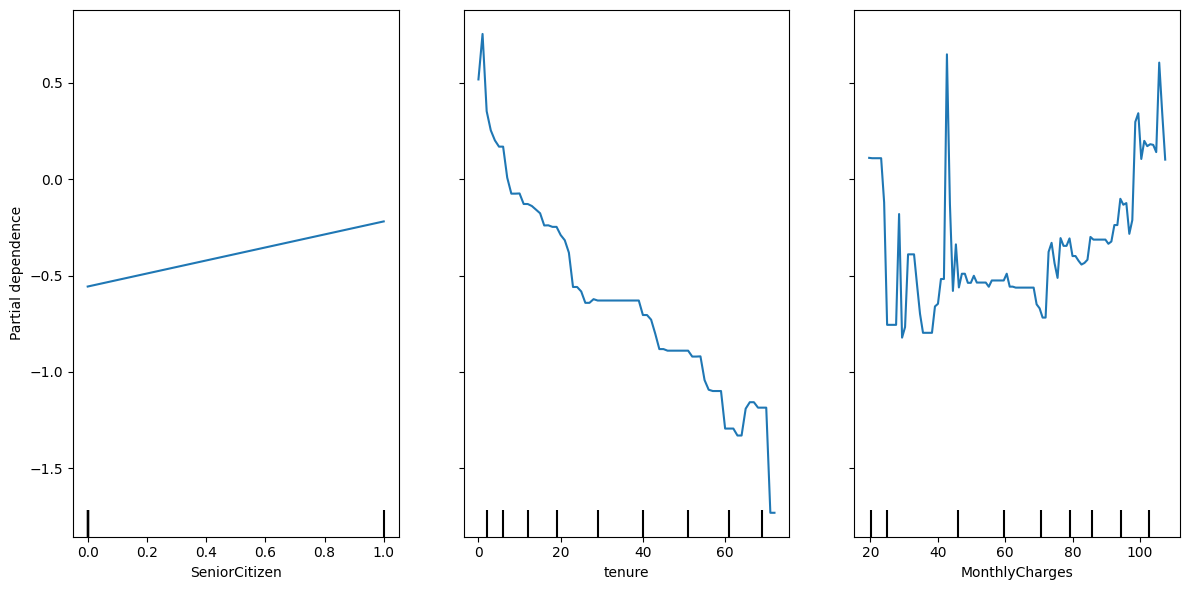

In [59]:
# Partial Dependence Plots
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(gb_model, X_train, features=[0, 1, 2], ax=ax)
plt.tight_layout()
plt.show()

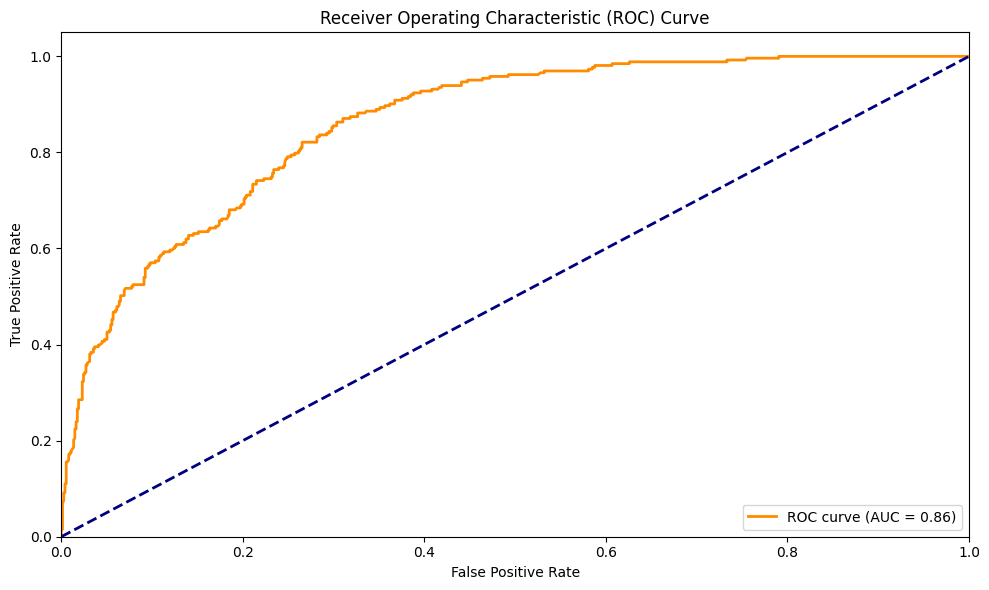

In [64]:
# ROC Curve
from sklearn.metrics import roc_curve, auc

y_pred_proba = gb_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

##Key insights and Recommendations

Based on the analysis and model built, the key insights gained for predicting customer churn are:

*   Customer tenure is an important factor. Customers who have been with the company longer are less likely to churn. The analysis shows two peaks in churn - a high volume of new customers and a group of long-term customers staying over 70 months.

*   Charges are correlated with churn. Higher monthly bills between £70-£100 are associated with more churn.

*   Contract type is a strong predictor. Month-to-month contracts have much higher churn rates compared to annual contracts

*   Additional services usage patterns differ between churned and non-churned customers. Understanding why the proportional of customers leaving have additional services could help us understand if there's an issue with any of these offers.

*   Feature importance analysis can reveal the most predictive variables.

*   Understanding our demographic and digital maturity is important; as the proportion of customers leaving are aged slightly older than those remaining.

*   The proportion of customers that churn utilise more manual methods for payment, so a recommendation could be that we provide alternative methods of payment that are more convenient to the customer.

We recommend further analysis in customer service interactions and  social media analysis to identify the number of service failures within the customers that are leaving, and potentially increase accuracy of the model.


